<h1> UNVEILING THE DARKNESS OF RAPE: A CASE STUDY IN LOS ANGELES </h1>

<h3> EXPLORATORY DATA ANALYSIS</h3>

In [171]:
#pip install pandas scikit-learn
#pip install scikit-learn imbalanced-learn
#pip install shap
#pip install missingno

<h6> Import necessary python libraries </h6>

In [172]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import folium
import calendar
import numpy as np
import os
import missingno as msno

<h6>Read my CSV file and store it in my dataframe rape_data. It is named rape_data due to the fact that my focus area is rape</h6>

In [173]:
# Read the dataset 
rape_data = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

<h5>Number of Rows and Columns of Dataset before cleaning and filtering</h5>

In [174]:
# Number of Rows and Columns
num_rows, num_cols = rape_data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Data Type
print("\nData types of each column:")
print(rape_data.dtypes)

Number of rows: 879106
Number of columns: 28

Data types of each column:
DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object


<h6> Display the first few rows of the data frame </h6>

In [175]:
display(rape_data.head())

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


<h4>DATA CLEANING</h4>

<p>Remove columns not necessary for my analysis on rape. 1. Area, because Area name, longitude and latitude are available for every analysis based on location. 2. Weapon Used Cd, because Weapon Desc is available, 3. Crm Cd 1-4 because it is the same as Crm Cd<p>

In [176]:
# List of columns to remove due to the fact they would not be needed for my report or analysis question
columnstoremove = ['AREA','Rpt Dist No','Part 1-2','Crm Cd','Premis Cd','Weapon Used Cd','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','LOCATION','Cross Street']
# Remove columns
rape_data = rape_data.drop(columns=columnstoremove)

<h5> Conversion of the DATE OCC column to datetime data type.</h5>

In [177]:
# Convert 'DATE OCC' column to datetime
rape_data['DATE OCC'] = pd.to_datetime(rape_data['DATE OCC']).dt.date
# Convert 'DATE reported' column to datetime
rape_data['Date Rptd'] = pd.to_datetime(rape_data['Date Rptd']).dt.date

C:\Users\Oluwaferanmi\AppData\Local\Temp\ipykernel_23076\499719935.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\Oluwaferanmi\AppData\Local\Temp\ipykernel_23076\499719935.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<h5> Cleaning of the Victim age
    Identifying Outliers using a Histogram</h5>

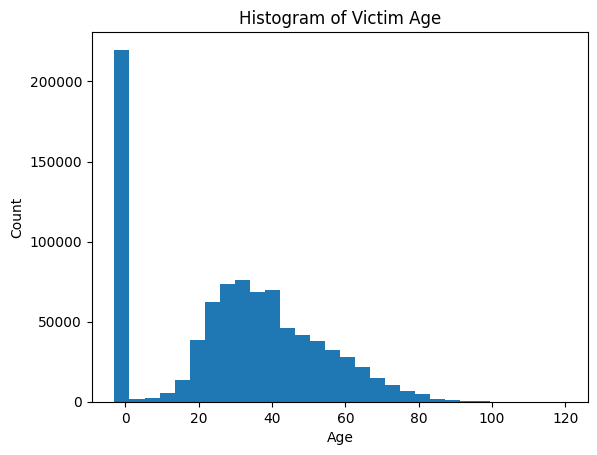

In [178]:
# Histogram
plt.hist(rape_data['Vict Age'].dropna(), bins=30)

# Set title and labels
plt.title('Histogram of Victim Age')
plt.xlabel('Age')
plt.ylabel('Count')
# Show plot
plt.show()


<p> People age zero and less CANNOT be rape victims. There is 1 rape victim of age 120, which is proven in the victim unique values code below. This histogram shows that there are outliers which is 0 and less than zero, Hence will remove victim ages that are zero and less.  </p>

In [179]:
unique_ages = rape_data['Vict Age'].unique()
print(unique_ages)

[ 36  25   0  76  31  23  29  35  41  24  66  27  62  71  19  51  69  52
  38  55  34  40  44  57  18  54  22  28  43  46  56  67  37  60  61  59
  32  30  50  45  20  58  48  26  47  21  64  39  75  12  68  13  33  53
  74  49  65  16  14  72  81  63  15  90  85  79  94  42  73  17  78  11
  82  80   5  77  84  88  96  99  86   7  70  92   3  83  10   6   9  87
   8  89  91   2   4  97  95  93  98 120  -2  -1  -3]


In [180]:
# Calculate skewness
skewness = rape_data['Vict Age'].skew()

print(f'The skewness of the Vict Age column is {skewness}, hence it is very asymmetric with a slight skew to the right')

The skewness of the Vict Age column is 0.12817113068611527, hence it is very asymmetric with a slight skew to the right


<h5> From Vict Age column, remove all ages that are less than or equals to 0 </h5>

In [181]:
# Remove from "Victim Age" ages that are less than or equals to 0
rape_data = rape_data[rape_data['Vict Age'] > 0]

<h5> Check for outliers after performing that step</h5>

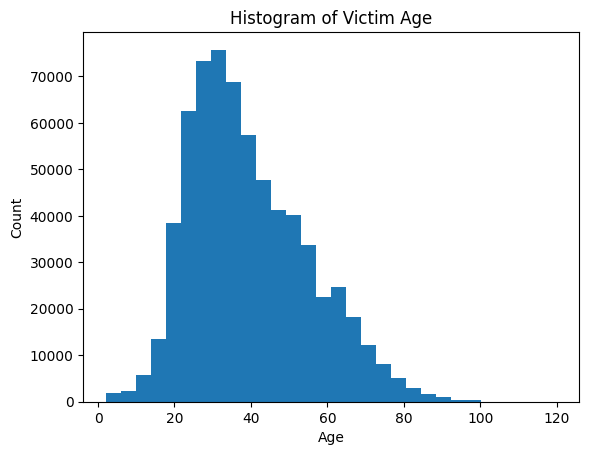

In [182]:
# Histogram
plt.hist(rape_data['Vict Age'].dropna(), bins=30)
plt.title('Histogram of Victim Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<h5> Converted DATE OCC to datetime using a SPECIFIC FORMAT. Created two(2) new columns from the DATE OCC column, named Occurred month and Occured Year. </h5>

In [183]:
rape_data['DATE OCC'] = pd.to_datetime(rape_data['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
rape_data['Occurred Month'] = rape_data['DATE OCC'].dt.strftime('%B')  #To display full month
rape_data['Occurred Year'] = rape_data['DATE OCC'].dt.year
# Create this is to create new columns for day, month, and year of occurred crime
display(rape_data.head(2))

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LAT,LON,Occurred Month,Occurred Year
0,10304468,2020-01-08,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978,January,2020
1,190101086,2020-01-02,2020-01-01,330,Central,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545,January,2020


<h5> Creating a new column named WEEKDAY from the DATE OCC column. This is to specify the day of the week the crime occured </h5>

In [184]:
# Create 'WEEKDAY' column
rape_data['WEEKDAY'] = rape_data['DATE OCC'].dt.day_name()

# Display the updated DataFrame
display(rape_data.head(2))

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LAT,LON,Occurred Month,Occurred Year,WEEKDAY
0,10304468,2020-01-08,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978,January,2020,Wednesday
1,190101086,2020-01-02,2020-01-01,330,Central,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545,January,2020,Wednesday


<h5>Filtering rape crimes from the Mocodes column. I am using the Mocodes to filter and not the Crm Cd Desc due to the fact that the mocode is a more specific description of the crime that occurred.</h5>
<h6> Mocodes to filter </h6>
<h7>1415 - Rape Kit
1262 - Raped while unconscious
0521 - Tongue or mouth to anus
    0515 - Put hand, finger or object into vagina
    0539 - Suspect puts hand in victim's rectum
    0540 - Suspect puts finger(s) in victim's rectum
    0541 - Suspect puts object(s) in victim's rectum
    0507 - Forced to orally copulate suspect
    0512 - Orally copulated victim
    0527 - Actual Intercourse
    0549 - Suspect ejaculates in victims mouth</h7>
    

In [185]:
# List of Mocodes to filter for rape cases
mocodes_to_filter = ['1415', '1262', '0521', '0515', '0539', '0540', '0541', '0507', '0512', '0527', '0549']

# Filter the dataset to keep only the rows where "Mocodes" contains any of the specified values
rape_data = rape_data[rape_data['Mocodes'].str.contains('|'.join(mocodes_to_filter), na=False)]

<h5> Create a new column named relationship with the victim using the Mocode 1822 - Stranger. Therefore where 1822 appears, it shows stranger and where there is no 1822 it shows associate which is a generalization of family and friends </h5>

In [186]:
# Create 'relationship with victim' column
rape_data['Relationship with victim'] = rape_data['Mocodes'].apply(lambda x: 'stranger' if '1822' in x else 'associates')
display(rape_data.head(2))

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LAT,LON,Occurred Month,Occurred Year,WEEKDAY,Relationship with victim
5,200100501,2020-01-02,2020-01-01,30,Central,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0452,-118.2534,January,2020,Wednesday,stranger
20,200100556,2020-01-20,2020-01-20,400,Central,"RAPE, FORCIBLE",1414 1402 1415 0444 0527 0537 0400 0507 1822,19,F,B,HOTEL,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,34.0542,-118.2566,January,2020,Monday,stranger


<p> Create a new column named sexual harrassment victim. This is the specify if a rape victim has been previously harrassed. Filtered from the mocodes 1903: Stalking, 1906: harassing emails, texts or calls, 0545: Male victim of sexual assault, 0531: suspect made sexually suggestive remarks, 2059: Victim reported sexual assault for unrelated incidents, 2041: harrassment via social media. All these are categorized under harrassement. If these mocodes appear in a case then it will print in the Sexual harrassment victim column YES, else NO</p>

In [187]:
# Define a function to check if any of the specified mocodes is in the 'Mocodes' column
def check_mocodes(mocodes):
    specified_mocodes = ['1903', '1906', '0545', '0531', '2059', '2041']
    for code in specified_mocodes:
        if code in mocodes:
            return 'yes'
    return 'no'

# Create 'sexual harrassment victim' column
rape_data['sexual harrassment victim'] = rape_data['Mocodes'].apply(check_mocodes)

# Display the first 2 rows of the dataframe
display(rape_data.head(2))


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,...,Weapon Desc,Status,Status Desc,LAT,LON,Occurred Month,Occurred Year,WEEKDAY,Relationship with victim,sexual harrassment victim
5,200100501,2020-01-02,2020-01-01,30,Central,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0452,-118.2534,January,2020,Wednesday,stranger,no
20,200100556,2020-01-20,2020-01-20,400,Central,"RAPE, FORCIBLE",1414 1402 1415 0444 0527 0537 0400 0507 1822,19,F,B,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,34.0542,-118.2566,January,2020,Monday,stranger,no


<h5> Histogram to show the distribution of missing values across the dataframe. The histogram below shows that only Weapon Desc has missing values, and also a high number of them </h5>

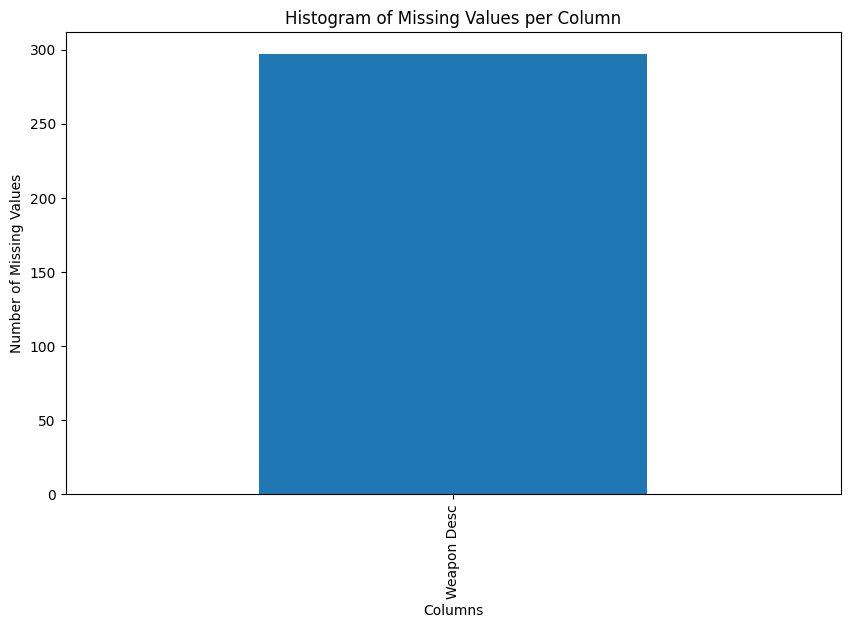

In [188]:
# Calculate the number of missing values per column
missing_values = rape_data.isnull().sum()

# Create a histogram of the missing values
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].plot(kind='bar')
plt.title('Histogram of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()


In [189]:
# Check for missing values
print(rape_data.isnull().sum())

DR_NO                          0
Date Rptd                      0
DATE OCC                       0
TIME OCC                       0
AREA NAME                      0
Crm Cd Desc                    0
Mocodes                        0
Vict Age                       0
Vict Sex                       0
Vict Descent                   0
Premis Desc                    0
Weapon Desc                  297
Status                         0
Status Desc                    0
LAT                            0
LON                            0
Occurred Month                 0
Occurred Year                  0
WEEKDAY                        0
Relationship with victim       0
sexual harrassment victim      0
dtype: int64


<h7> Weapon Desc has 297 missing values, hence will remove the column. </h7>

In [190]:
# to drop 'Weapon Desc' column
rape_data = rape_data.drop(columns='Weapon Desc')

In [191]:
# Check for missing values
print(rape_data.isnull().sum())

DR_NO                        0
Date Rptd                    0
DATE OCC                     0
TIME OCC                     0
AREA NAME                    0
Crm Cd Desc                  0
Mocodes                      0
Vict Age                     0
Vict Sex                     0
Vict Descent                 0
Premis Desc                  0
Status                       0
Status Desc                  0
LAT                          0
LON                          0
Occurred Month               0
Occurred Year                0
WEEKDAY                      0
Relationship with victim     0
sexual harrassment victim    0
dtype: int64


<h5> SUMMARY STATISTICS </h5>

In [192]:
# Descriptive statistics
rape_data.describe()

,DR_NO,DATE OCC,TIME OCC,Vict Age,LAT,LON,Occurred Year
count,5.659000e+03,5659,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000
mean,2.172495e+08,2021-12-09 15:59:19.286092800,1150.071921,26.701891,34.060615,-118.323685,2021.463156
min,2.001005e+08,2020-01-01 00:00:00,1.000000,2.000000,0.000000,-118.656100,2020.000000
25%,2.103093e+08,2020-12-28 00:00:00,300.000000,16.000000,34.008400,-118.406950,2020.000000
50%,2.203159e+08,2021-12-10 00:00:00,1200.000000,24.000000,34.055900,-118.309000,2021.000000
75%,2.301210e+08,2022-11-21 00:00:00,1900.000000,34.000000,34.127800,-118.273900,2022.000000
max,2.421046e+08,2024-01-14 00:00:00,2359.000000,99.000000,34.326600,0.000000,2024.000000
std,1.105528e+07,NaN,801.859115,13.707429,0.466043,1.576348,1.101035


<h5>Number of Rows and Columns after cleaning and filtering specifically for Rape</h5>

In [193]:
# Number of Rows and Columns
num_rows, num_cols = rape_data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Data Type
print("\nData types of each column:")
print(rape_data.dtypes)

Number of rows: 5659
Number of columns: 20

Data types of each column:
DR_NO                                 int64
Date Rptd                            object
DATE OCC                     datetime64[ns]
TIME OCC                              int64
AREA NAME                            object
Crm Cd Desc                          object
Mocodes                              object
Vict Age                              int64
Vict Sex                             object
Vict Descent                         object
Premis Desc                          object
Status                               object
Status Desc                          object
LAT                                 float64
LON                                 float64
Occurred Month                       object
Occurred Year                         int32
WEEKDAY                              object
Relationship with victim             object
sexual harrassment victim            object
dtype: object


<h3> DATA VISUALIZATION</h3>

<h4> Pie chart to show the distribution of Relationship with Victim </h4>

<h5> This shows that 73% of abusers are friends or family of the victim </h5>

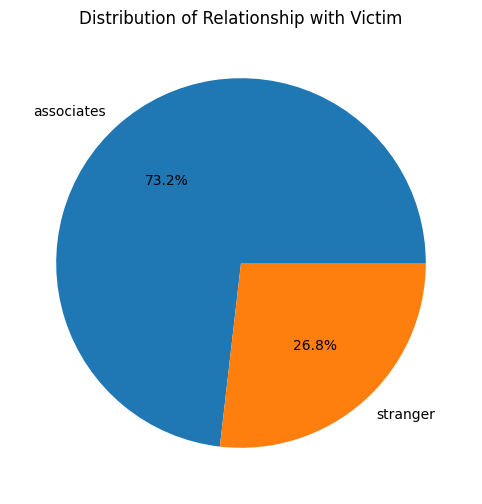

In [194]:
# Create a pie chart for 'relationship with victim'
plt.figure(figsize=(10, 6)) 
rape_data['Relationship with victim'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Relationship with Victim')
plt.ylabel('') 
plt.show()

<h4> A Histogram to show the distribution of rape occurences according to the time of the day, using the TIME OCC columm. Assuming NIGHT is 6pm (18:00 hours) to 6am (6:00 hours) when is when the sun goes down to when it sets, and DAY is 6am (6:00 hours) to 6pm (18:00 hours) </h4>
<h5>The histogram below shows that most rape crimes occur in the night (within the hours of 6pm - 6am) than during the day (within the hours of 6am -6pm )</h5>

In [195]:
# Convert 'TIME OCC' to string format
rape_data['TIME OCC'] = rape_data['TIME OCC'].apply(lambda x: str(x).zfill(4))

In [196]:
# Extract the hour from 'TIME OCC'
rape_data['Hour'] = rape_data['TIME OCC'].apply(lambda x: int(x[:2]))

In [197]:
# Classify the time into 'Night' or 'Day'
rape_data['Time of Day'] = rape_data['Hour'].apply(lambda x: 'Night' if (x >= 18 or x < 6) else 'Day')

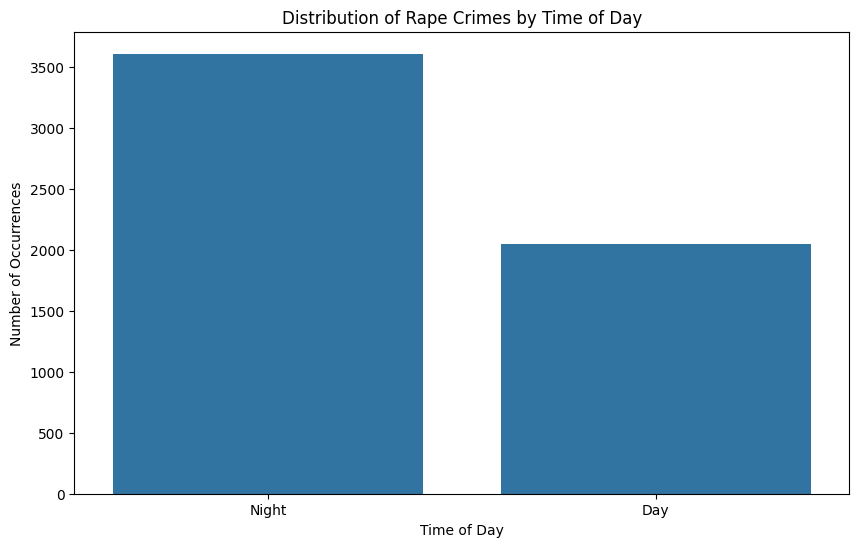

In [198]:
plt.figure(figsize=(10, 6))
# Create histogram
sns.countplot(x=rape_data['Time of Day'])
plt.title('Distribution of Rape Crimes by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Occurrences')
plt.show()

<h3>Pie chart to show the distribution of rape victims that were previously sexually harassed</h3>

<p>The pie chart below shows that 94.6 percent of rape victims were initially harassed before actually being raped<p>

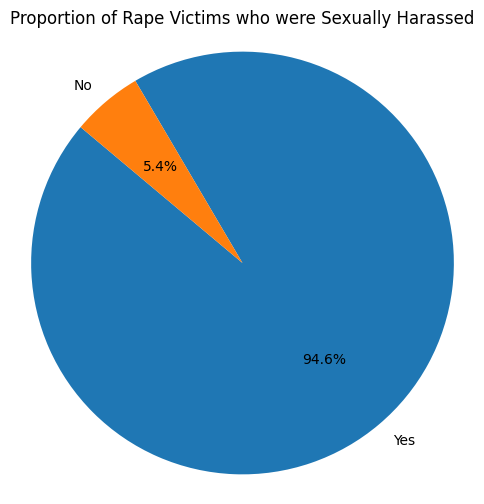

In [199]:
harassment_counts = rape_data['sexual harrassment victim'].value_counts()

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(harassment_counts, labels=['Yes', 'No'], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Proportion of Rape Victims who were Sexually Harassed')
plt.show()


<h4> Histogram to show the day of the week which has the highest crime occurence</h4>

<h5>The histogram below shows that most rape crimes occur during the weekend. The highest occurrence is saturday, sunday then friday.</h5>

C:\Users\Oluwaferanmi\AppData\Local\Temp\ipykernel_23076\225162063.py:4: UserWarning:


The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.



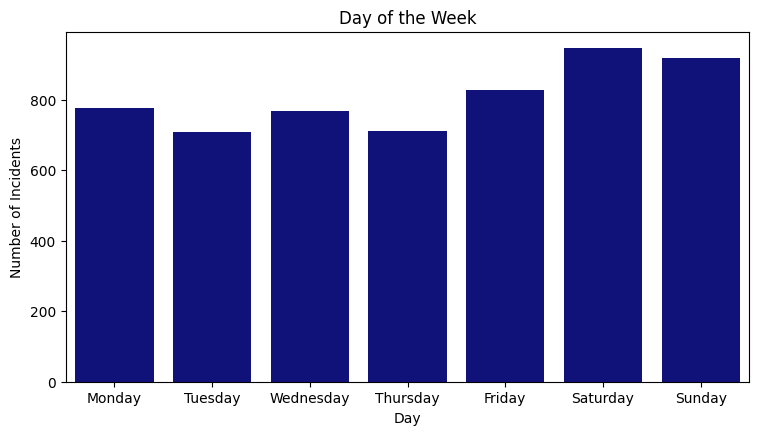

In [200]:
# Day of the Week
plt.figure(figsize=(30, 10)) 
plt.subplot(2, 3, 2)
sns.countplot(data=rape_data, x='WEEKDAY', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'], hue='WEEKDAY', palette=['darkblue'], legend=False)
plt.title('Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Incidents')
plt.show()

<h4> Histogram to show the distribution of rape occurences yearly, excluding 2024, due to the fact that the data from 2024 is not complete, as we are still in the year. 2024</h4>
<h5> The histogram below shows the rape crimes were the lowest in 2023 at 22 percent and the highest in 2022 at 26.6 percent. </h5>

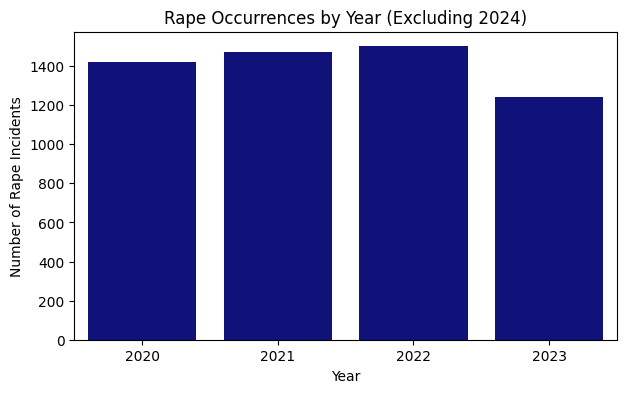

In [201]:
# Filter out the data for the year 2024
filtered_data = rape_data[rape_data['Occurred Year'] != 2024]

plt.figure(figsize=(7, 4))  # Set the figure size
sns.countplot(data=filtered_data, x='Occurred Year', color='darkblue')
plt.title('Rape Occurrences by Year (Excluding 2024)')
plt.xlabel('Year')
plt.ylabel('Number of Rape Incidents')
plt.show()


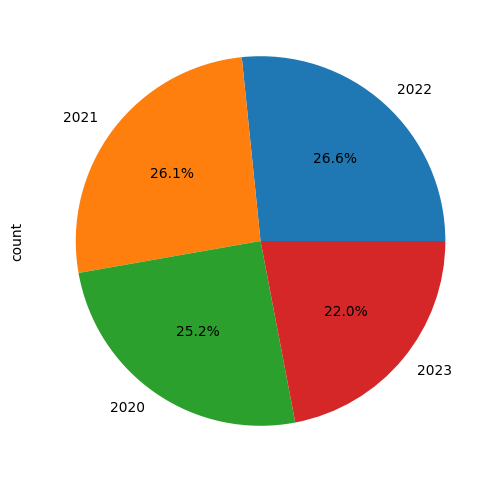

In [202]:
# Filter out the data for the year 2024
filtered_data = rape_data[rape_data['Occurred Year'] != 2024]

# Calculate the counts of incidents in each year
year_counts = filtered_data['Occurred Year'].value_counts()
# Create a pie chart
plt.figure(figsize=(10, 6))
year_counts.plot(kind='pie', autopct='%1.1f%%')

# Display the plot
plt.show()


<h3> Plot a histogram to show the Delay in reporting rape crimes</h3>

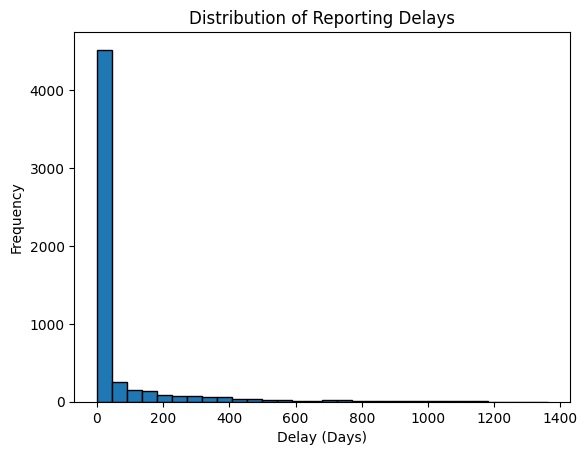

In [203]:
rape_data['DATE OCC'] = pd.to_datetime(rape_data['DATE OCC'])
rape_data['Date Rptd'] = pd.to_datetime(rape_data['Date Rptd'])
# Calculate the difference in days
rape_data['Report Delay'] = (rape_data['Date Rptd'] - rape_data['DATE OCC']).dt.days

# Plot a histogram
plt.hist(rape_data['Report Delay'], bins=30, edgecolor='black')
plt.title('Distribution of Reporting Delays')
plt.xlabel('Delay (Days)')
plt.ylabel('Frequency')
plt.show()

<p> The histogram above shows that most rape crimes are reported the same day or the next day. Few are reported months or even years later.</p>

In [204]:
rape_data['Report Delay'] = (rape_data['Date Rptd'] - rape_data['DATE OCC']).dt.days

# Count the frequency of each unique delay value
delay_counts = rape_data['Report Delay'].value_counts().reset_index()

# Rename the columns for clarity
delay_counts.columns = ['Report Delay (Days)', 'Frequency']

# Display the table
print(delay_counts)

     Report Delay (Days)  Frequency
0                      0       1583
1                      1       1061
2                      2        409
3                      3        282
4                      4        173
..                   ...        ...
543                  461          1
544                  600          1
545                  604          1
546                  454          1
547                  306          1

[548 rows x 2 columns]


<h3> The next task is to find out if the delay in reporting a crime affects the crime being solved</h3>
<p>First off, we have Status Description as Juvenile Arrest, Adult Arrest, Juv Other, Adult Other, Investigation continues. Adult other and Juv other were not specified as to what exactly they mean, but it clearly shows there was no arrest in that case, i will assume the case is still pending in those instances and merge them with Investigation continues and call it investigation ongoing, I will then combine Juvenile arrest and Adult arrest and call it case solved. Hence i will have 2 variables in the column Status Desc, named Case solved and Invest Ongoing</p>

<h4>TO COMBINE THE FIVE STATUS DESCRIPTIONS INTO TWO</h4>

In [205]:
# Define a function to combine the categories
def combine_categories(status):
    if status in ['Juv Other', 'Adult Other', 'Invest Cont']:
        return 'Invest Ongoing'
    elif status in ['Juv Arrest', 'Adult Arrest']:
        return 'Case Solved'
    else:
        return status

# Apply the function to the 'Status Desc' column
rape_data['Status Desc'] = rape_data['Status Desc'].apply(combine_categories)


<h4>Scatter plot to show if the case being solved is dependent on the time taken to report the crime</h4>

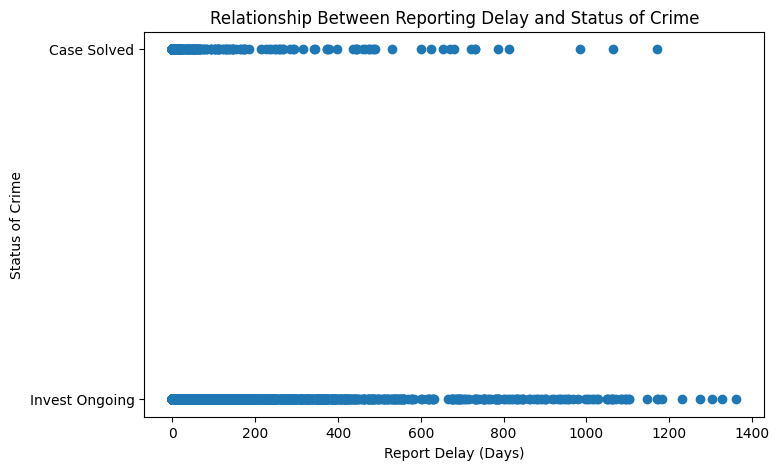

In [206]:
# Create a scatter plot
plt.figure(figsize=(8,5))
plt.scatter(rape_data['Report Delay'], rape_data['Status Desc'])
plt.title('Relationship Between Reporting Delay and Status of Crime')
plt.xlabel('Report Delay (Days)')
plt.ylabel('Status of Crime')
plt.show()


<p>The scatter plot above shows that rape crimes reported earlier are most likely to be solved than crimes reported after 10 days</p>

<h3>Histogram to show the perpetrators relationship with victims that took more than 10 days to report </h3>

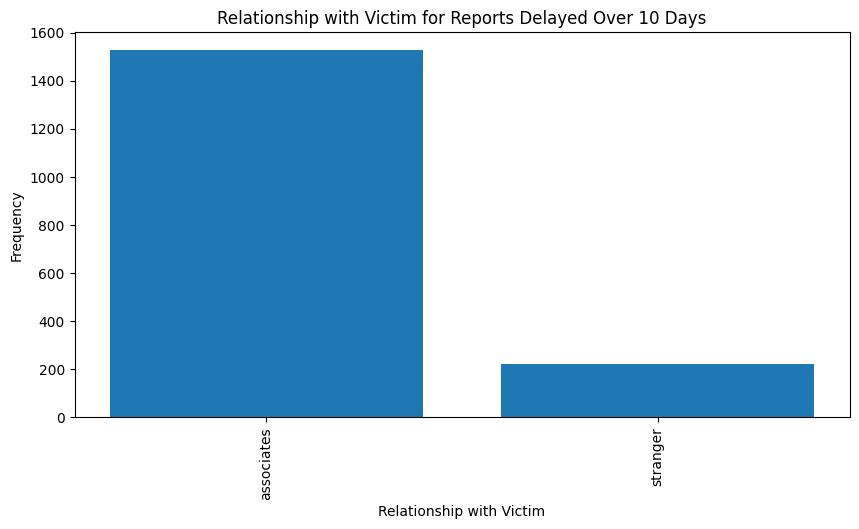

In [207]:
# Filter the dataframe for reports that took over 10 days
delay_over_10_days = rape_data[rape_data['Report Delay'] > 10]

# Get the count of each unique relationship with the victim
relationship_counts = delay_over_10_days['Relationship with victim'].value_counts()

# Create a histogram
plt.figure(figsize=(10,5))
plt.bar(relationship_counts.index, relationship_counts.values)
plt.title('Relationship with Victim for Reports Delayed Over 10 Days')
plt.xlabel('Relationship with Victim')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


<p> The histogram above shows that victims raped by their friends and family take longer to report, due to fear, or manipulation</p>

<h4> Line plot to show the rate of rape occurences montly.</h4>
<h6> The line plot below shows the month with the highest rape occurence is January, and December has the lowest</h6>

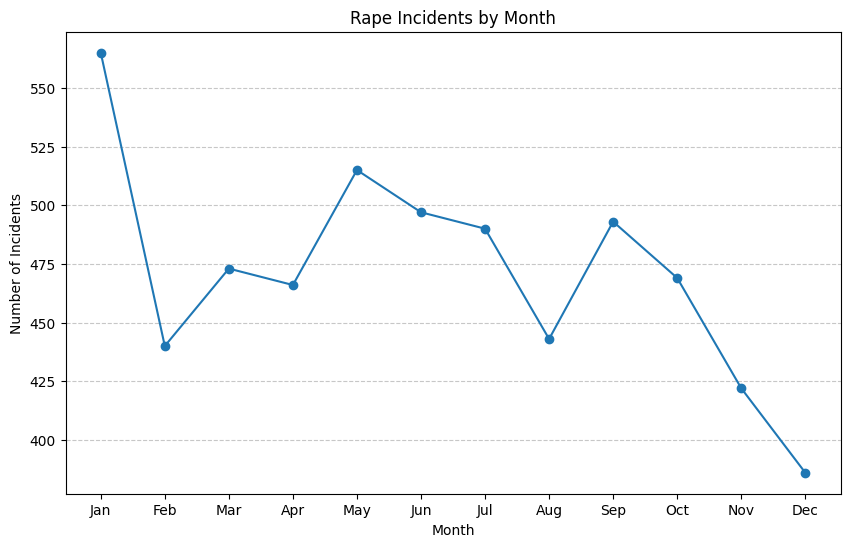

In [208]:
# Incidents per month
monthly_incidents = rape_data.groupby(rape_data['DATE OCC'].dt.month).size()

# Plot monthly incidents
plt.figure(figsize=(10, 6))
monthly_incidents.plot(marker='o', linestyle='-')
plt.title('Rape Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Customize x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h4> Word Cloud Image to show the distribution of Premises where rape occurs. The bigger the text, the more the occurence</h4>

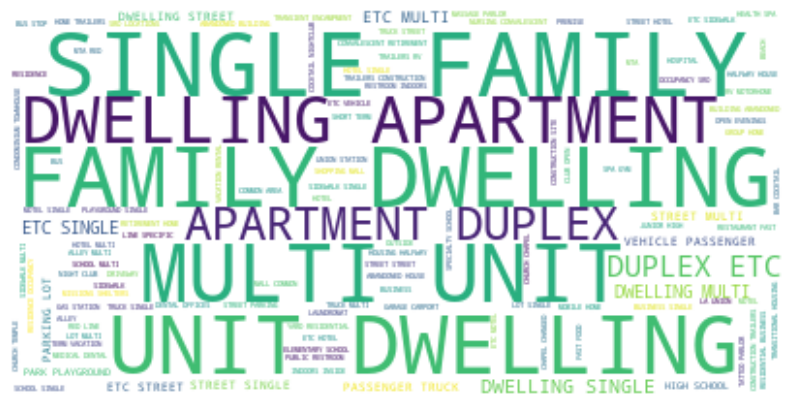

In [209]:
from wordcloud import WordCloud
text = ' '.join(description for description in rape_data['Premis Desc'])
# Create and generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [210]:
Premis_counts = rape_data.groupby('Premis Desc').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
Premis_counts

,Premis Desc,counts
88,SINGLE FAMILY DWELLING,1669
63,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",1501
95,STREET,585
39,HOTEL,221
110,"VEHICLE, PASSENGER/TRUCK",203
...,...,...
48,MINI-MART,1
52,MTA - GOLD LINE - CHINATOWN,1
53,MTA - GREEN LINE - HARBOR FWY,1
76,POLICE FACILITY,1


<h4> Make a list of the Area Names and count the number of occurences. The table below shows that Central Area has the highest rape occurences and Van Nuys has the lowest </h4>

In [211]:
# Group the area name and count total incidents in each area
area_counts = rape_data.groupby('AREA NAME').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
area_counts

,AREA NAME,counts
1,Central,486
0,77th Street,437
6,Hollywood,411
15,Southwest,365
11,Olympic,352
14,Southeast,327
13,Rampart,316
9,Newton,270
12,Pacific,266
7,Mission,252


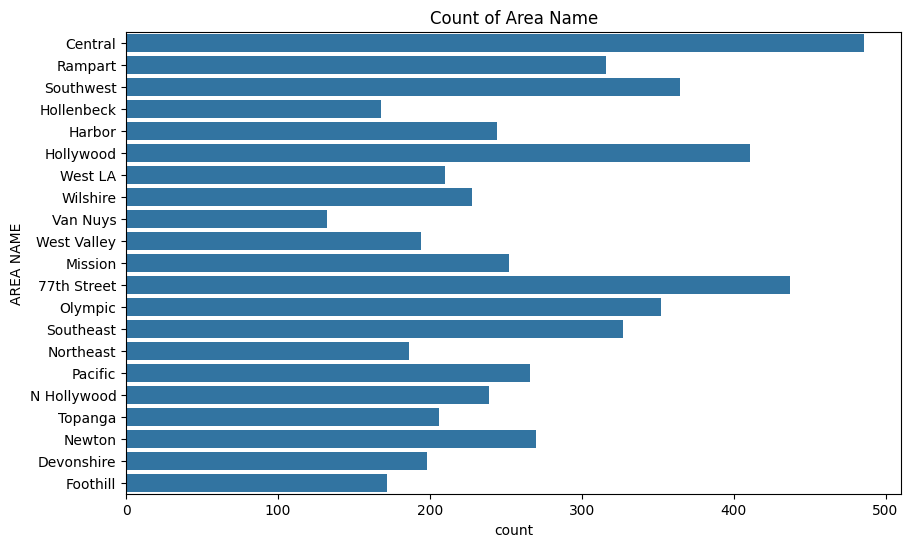

In [212]:
# Count Plot of Area Name
plt.figure(figsize=(10,6))
plt.title('Count of Area Name')
sns.countplot(y=rape_data['AREA NAME'])
plt.show()

<h4> Pie Chart Illustrating the distribution of Victim Sex </h4>
<h6> The chart belows shows that 91.6 percent of females get raped and 8.4 percent of males get raped</h6>

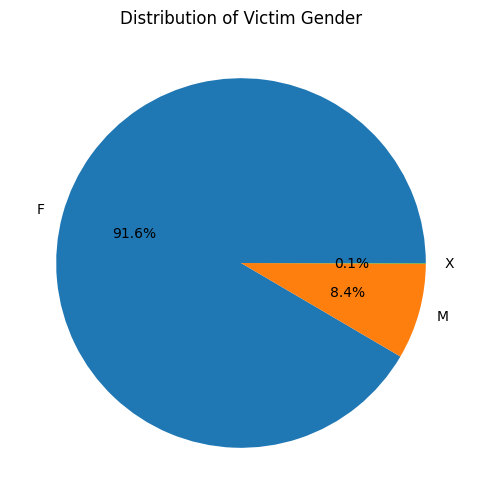

In [213]:
# Calculate the counts of victim genders
gender = rape_data['Vict Sex'].value_counts()

plt.figure(figsize=(8, 6))
gender.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Victim Gender')
plt.ylabel('')
plt.show()


<h4> A histogram to show the Distribution of the Ages of the Victim </h4>

<h6> The histogram below shows that most of the rape victims are within the ages of 10-20</h6>

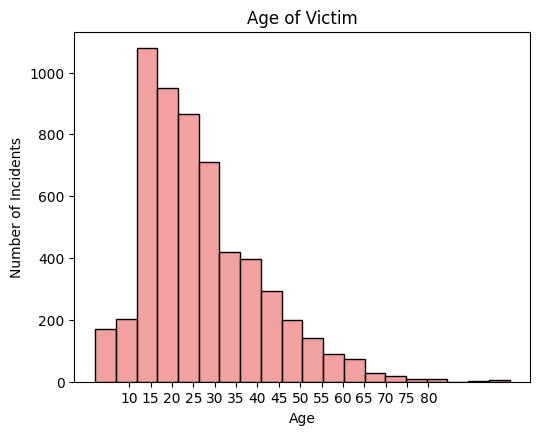

In [214]:
# Age of Victim
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 5)
sns.histplot(data=rape_data, x='Vict Age', bins=20, kde=False, color='lightcoral')
plt.title('Age of Victim')
plt.xlabel('Age')
plt.ylabel('Number of Incidents')

# Age range
age_labels = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
plt.xticks(age_labels, age_labels)

plt.show()

<h4> A bar plot to show the top 10 locations for Victims within the age 18-30, this is to conclude that female youth are not getting raped because they go out partying, but to show they are getting abused in their homes.</h4>

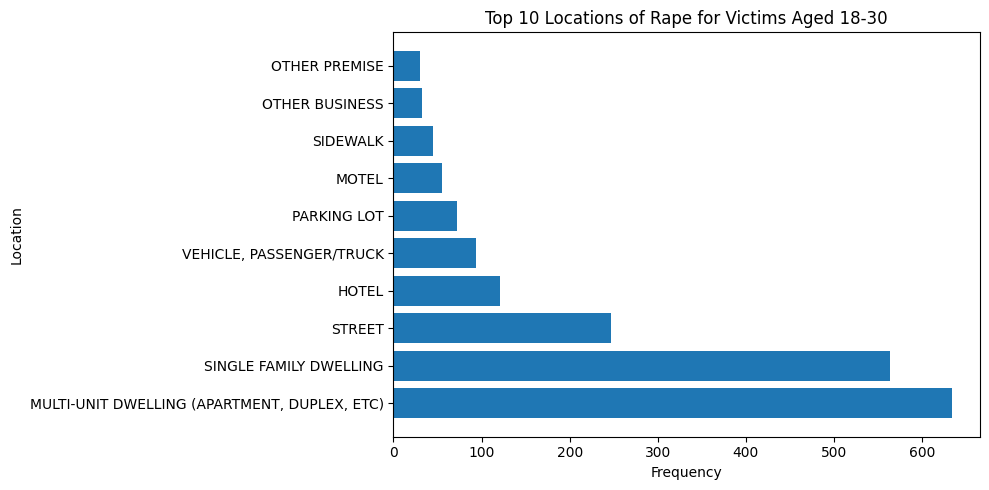

In [215]:
# Create a horizontal bar plot
plt.figure(figsize=(10,5)) 
plt.barh(top_10_locations_18_30.index, top_10_locations_18_30.values) 
plt.title('Top 10 Locations of Rape for Victims Aged 18-30')
plt.ylabel('Location') 
plt.xlabel('Frequency') 
plt.tight_layout()  
plt.show()


In [216]:
# Calculate the average victim age
average_age = rape_data['Vict Age'].mean()

# Round the average age to the nearest whole number
age_roundedup = round(average_age)

# Print the rounded average victim age
print(f"The average age of victims is {age_roundedup}")



The average age of victims is 27


<h4> A count plot of the Victim race, this shows most victims of rape are hispanic, black, then white, respectively</h4>

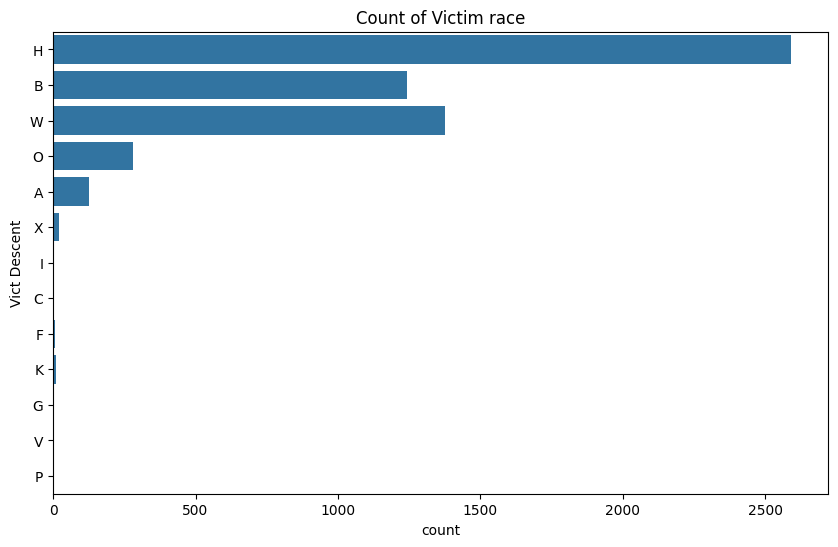

In [217]:
# Count Plot of Victim Race
plt.figure(figsize=(10,6))
plt.title('Count of Victim race')
sns.countplot(y=rape_data['Vict Descent'])
plt.show()

In [218]:
# Group the victim race and count total victims in each area
Race_counts = rape_data.groupby('Vict Descent').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
Race_counts

,Vict Descent,counts
5,H,2590
11,W,1374
1,B,1241
8,O,281
0,A,126
12,X,20
7,K,12
3,F,6
2,C,3
4,G,2


<h4> Histogram to show the rate of the Status. Majority of the Statuses are IC meaning investigation continues, therefore most rape investigations are not concluded</h4>

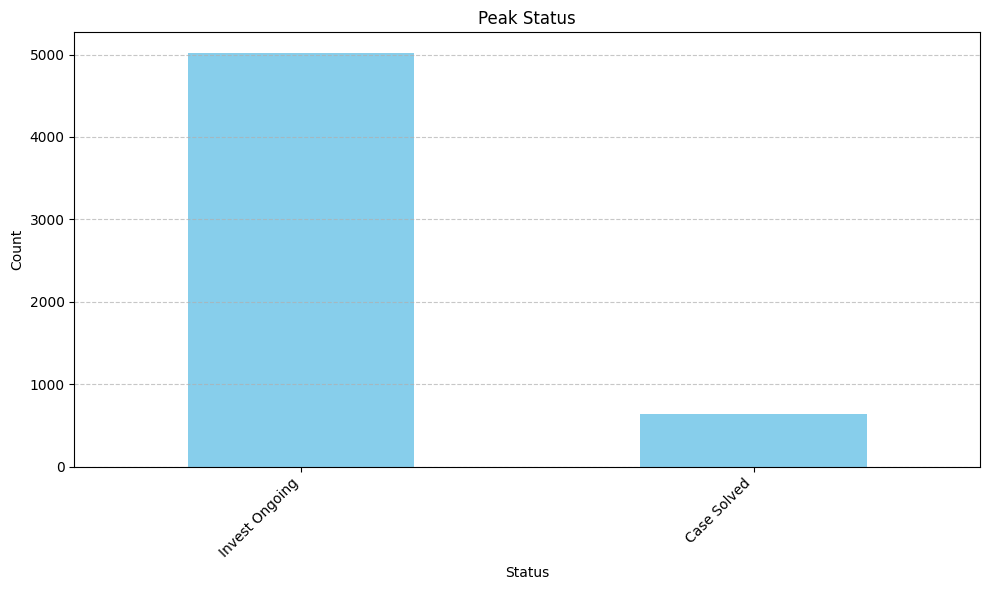

In [219]:
status_counts = rape_data['Status Desc'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Peak Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<h4>To create a scatter plot on a map using the Longitude and Latitude, to display per rape incident the Premises the crime occurred, the victim sex, and the area name</h4>

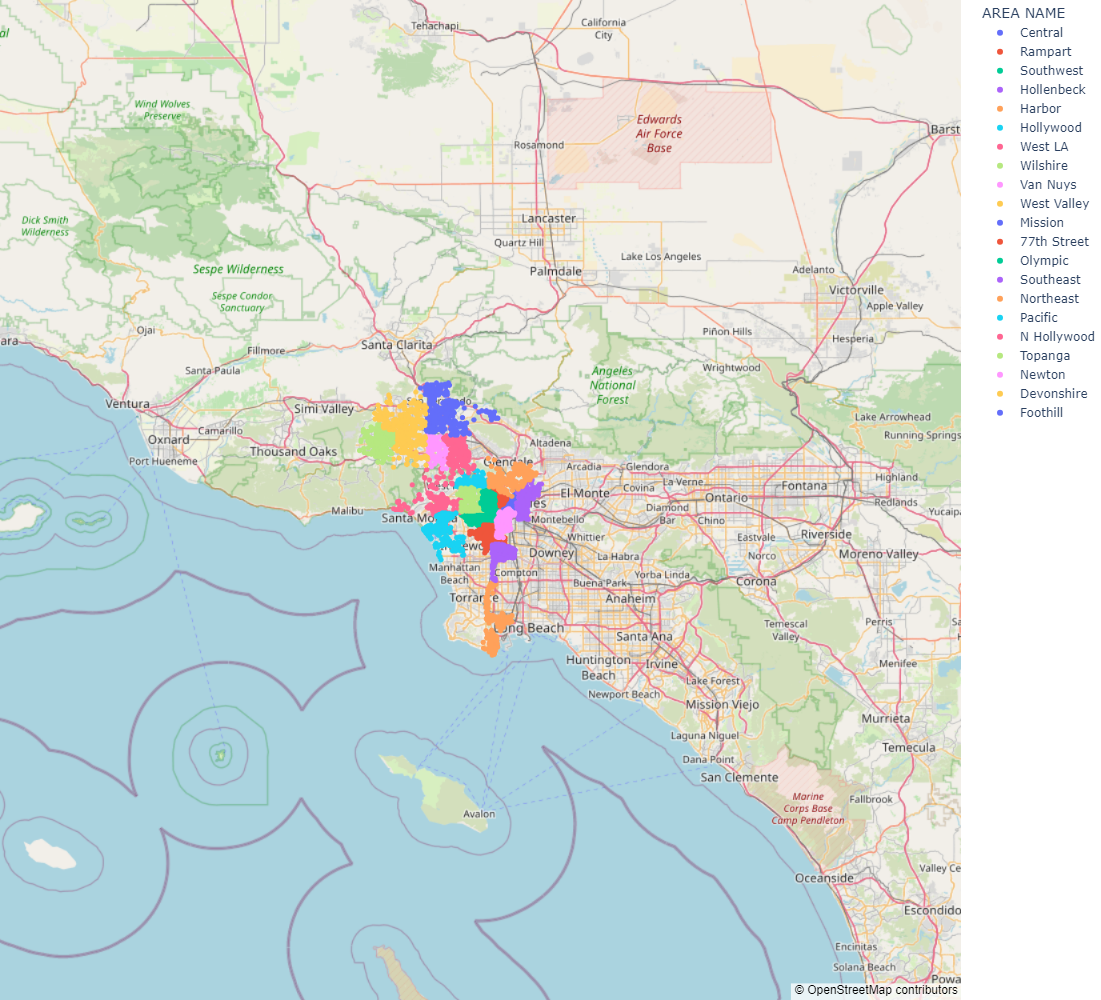

In [220]:
# Create a scatter plot on a map
fig = px.scatter_mapbox(rape_data, 
                        lat="LAT", 
                        lon="LON",
                        zoom=8,
                        color="AREA NAME",
                        hover_data=["Premis Desc","Vict Sex", "AREA NAME"], 
                        height=1000,
                        width=1500,
                        color_continuous_scale=px.colors.sequential.Plasma)


fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Display
fig.show()


<h2>MACHINE LEARNING</h2>

<h3> Predictive modeling</h3>

<h4> Choosing a Model</h4>

<h6>In order to choose a model, load the iris dataset, create and train a SVM and KNN classifier, evaluate them, compare them and select the best one</h6>

In [221]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import neighbors

# Load iris dataset
iris = datasets.load_iris()

<h6>Split and train dataset</h6>

In [222]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

<h6> Create a SVM classifier </h6>

In [223]:
clf_svm = svm.SVC(kernel='linear') 
clf_svm.fit(X_train, y_train)
svm_score = clf_svm.score(X_test, y_test)

<h6> Create a KNN classifier </h6>

In [224]:
clf_knn = neighbors.KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)
knn_score = clf_knn.score(X_test, y_test)

<h6> Compare their scores</h6>

In [225]:
print('SVM score:', svm_score)
print('KNN score:', knn_score)

SVM score: 0.9333333333333333
KNN score: 0.9333333333333333


In [226]:
if svm_score > knn_score:
    print('SVM is the best model')
else:
    print('KNN is the best model')

KNN is the best model


In [227]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter values that should be searched
k_range = list(range(1, 31)) # example range, can be adjusted

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(X_train, y_train)

# View the complete results
print(grid.cv_results_)

# Examine the best model
print(grid.best_score_)
print(grid.best_params_)


{'mean_fit_time': array([0.00095973, 0.00050206, 0.        , 0.00161145, 0.00160973,
       0.        , 0.00158782, 0.        , 0.00182927, 0.00071769,
       0.00089762, 0.00095348, 0.00065055, 0.00147057, 0.00213058,
       0.00147133, 0.00069451, 0.00172224, 0.00337107, 0.00131598,
       0.000879  , 0.00050573, 0.00092137, 0.00093892, 0.00085266,
       0.00054748, 0.00083401, 0.00041776, 0.00072274, 0.0004406 ]), 'std_fit_time': array([0.00057625, 0.00058017, 0.        , 0.00483434, 0.00482919,
       0.        , 0.00476346, 0.        , 0.00333581, 0.00047039,
       0.00033791, 0.00033263, 0.00053723, 0.00169586, 0.00284792,
       0.00242155, 0.00066072, 0.00232207, 0.00268825, 0.00121452,
       0.00046423, 0.0005058 , 0.00054532, 0.00071108, 0.00097112,
       0.00059779, 0.00066272, 0.00046168, 0.00047541, 0.0004557 ]), 'mean_score_time': array([0.00288064, 0.00253813, 0.00313261, 0.00158856, 0.00157509,
       0.00315418, 0.00156887, 0.00327439, 0.00239489, 0.00146995,
     

<h4>Predicting the next premises rape might occur using KNN</h4>

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [229]:
# Create a copy of the data
data1 = rape_data.copy()

In [230]:
# Preparation of the feature
X = data1.drop('Premis Desc', axis=1)
y = data1['Premis Desc']

In [231]:
# Encode categorical features
le = LabelEncoder()
X = X.apply(le.fit_transform)

In [232]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
# Create a KNN Classifier with k=11
clf_knn = KNeighborsClassifier(n_neighbors=11)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [234]:
# Make predictions
y_pred = clf_knn.predict(X_test)

In [235]:
# Check the accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Predictions:', y_pred)

Accuracy: 0.34363957597173145
Predictions: ['MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)' 'SINGLE FAMILY DWELLING'
 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)' ...
 'SINGLE FAMILY DWELLING' 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)'
 'SINGLE FAMILY DWELLING']


<h4>Predicting the next premises rape might occur using Random Forest</h4>

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Create a copy of the data
data1 = rape_data.copy()

In [237]:
# Preparation of the feature
X = data1.drop('Premis Desc', axis=1)
y = data1['Premis Desc']

In [238]:
# Encode categorical features
le = LabelEncoder()
X = X.apply(le.fit_transform)

In [239]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [240]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [241]:
# Make predictions
y_pred = clf.predict(X_test)

In [242]:
# Check the accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Predictions:', y_pred)

Accuracy: 0.4010600706713781
Predictions: ['MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)' 'STREET'
 'SINGLE FAMILY DWELLING' ... 'SINGLE FAMILY DWELLING' 'STREET'
 'SINGLE FAMILY DWELLING']


<h5>Comparison between KNN and Random Forest classifier. KNN has an accuracy of 0.34 and Random forest has an accuracy of 0.4, which is better </h5>

<h4>Predict whether a rape incident will occur during the day or night using KNN</h4>

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a copy of the DataFrame to avoid changing the original data
data4 = rape_data.copy()

# Convert 'TIME OCC' to 'day' or 'night'
data4['Day_Night'] = data4['Hour'].apply(lambda x: 'Day' if 6 <= int(x) <= 18 else 'Night')

# Define predictors and target variable
X = data4.drop('Day_Night', axis=1)
y = data4['Day_Night']

# Convert categorical variables to numeric
le = LabelEncoder()
X = X.apply(le.fit_transform)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN Classifier with k=7
clf_knn = KNeighborsClassifier(n_neighbors=7)
clf_knn.fit(X_train, y_train)

# Make predictions
y_pred = clf_knn.predict(X_test)

# Check the accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Predictions:', y_pred)


Accuracy: 0.5715547703180212
Predictions: ['Day' 'Night' 'Night' ... 'Day' 'Day' 'Night']


<h4>Predict whether a rape incident will occur during the day or night using Random Forest</h4>

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rape = pd.DataFrame({
    'TIME OCC': ['30', '400', '2200', '900', '2000', '135', '400', '400', '1900'],
    'Crm Cd Desc': ['RAPE, FORCIBLE', 'RAPE, FORCIBLE', 'SEXUAL PENETRATION W/FOREIGN OBJECT', 'RAPE, FORCIBLE', 'SEXUAL PENETRATION W/FOREIGN OBJECT', 'RAPE, FORCIBLE', 'RAPE, FORCIBLE', 'ORAL COPULATION', 'RAPE, FORCIBLE'],
    'Hour': ['0', '4', '22', '9', '20', '1', '4', '4', '19']
})

# Create a copy of the DataFrame to avoid changing the original data
data4 = rape.copy()

# Convert 'TIME OCC' to 'day' or 'night'
data4['Day_Night'] = data4['Hour'].apply(lambda x: 'Day' if 6 <= int(x) <= 18 else 'Night')

# Define predictors and target variable
X = data4.drop('Day_Night', axis=1)
y = data4['Day_Night']

# Convert categorical variables to numeric
le = LabelEncoder()
X = X.apply(le.fit_transform)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Check the accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Predictions:', y_pred)

Accuracy: 1.0
Predictions: ['Night' 'Night']


<h4>Predict Victim age of the next incidents using Random Forest</h4>

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a copy of the DataFrame to avoid changing the original data
data_copy = rape_data.copy()

# Convert datetime columns to string
datetime_cols = data_copy.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    data_copy[col] = data_copy[col].astype(str)

# Convert categorical variables to numeric using Label Encoding
le_dict = {}  # Dictionary to store LabelEncoder instances for each column
categorical_cols = data_copy.select_dtypes(include=['object']).columns  # Automatically select non-numeric columns
for col in categorical_cols:
    le = LabelEncoder()
    data_copy[col] = le.fit_transform(data_copy[col])
    le_dict[col] = le  # Store the LabelEncoder instance

# Define predictors and target variable
X = data_copy.drop('Status Desc', axis=1)  # Drop the target column to create the feature set
y = data_copy['Status Desc']  # Target variable

# Encode the target variable
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Convert numerical predictions back to original labels
y_pred_labels = le_y.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)
print('Predicted labels:', y_pred_labels)
print(rape_data['Status Desc'].unique())



Accuracy: 0.9867491166077739
Confusion Matrix:
 [[ 114   15]
 [   0 1003]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       129
           1       0.99      1.00      0.99      1003

    accuracy                           0.99      1132
   macro avg       0.99      0.94      0.97      1132
weighted avg       0.99      0.99      0.99      1132

Predicted labels: [1 1 1 ... 1 1 1]
['Invest Ongoing' 'Case Solved']
